In [7]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
def detect_outliers_iqr(data):
  data= sorted(data)
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  IQR = q3-q1
  lwr_bound = q1-(1.5*IQR)
  upr_bound = q3+(1.5*IQR)
  counter= 0
  for i in data: 
    if (i<lwr_bound or i>upr_bound):
      counter+=1
  return counter

outliers = []
def detectiqr(data):
  data= sorted(data)
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  IQR = q3-q1
  lwr_bound = q1-(1.5*IQR)
  upr_bound = q3+(1.5*IQR)
  counter= 0
  for i in data: 
    if (i<lwr_bound or i>upr_bound):
       outliers.append(i)
  return outliers


In [8]:
import pandas as pd
df1 = pd.read_excel('/content/CollectedData.xlsx', sheet_name='Sheet2',header=None)
df1.rename(columns={3:'age',22: 'clo',19:'met',26:'dewpt',27:'PlaneRadtemp',37:'Ta',38:'tmrt',40:'vel',42:'ait turb',43 :'Pa,',44:'Rh',74:'TaOutdoor',77:'RhOutdoor',8:'Amv',49:'PMV'}, inplace=True)
df1.to_csv('test_with_col.csv', index=False)
df1

,0,1,2,age,4,5,6,7,Amv,9,...,70,71,72,73,TaOutdoor,75,76,RhOutdoor,78,79
0,8.000000,1.0,NaN,0.0,1993.0,146.0,NaN,2.0,1.0,NaN,...,NaN,15.300000,7.8,11.55,58.0,100.0,79.0,15.4,8.0,11.70
1,8.000000,2.0,NaN,0.0,1993.0,146.0,NaN,2.0,1.0,NaN,...,NaN,15.300000,7.8,11.55,58.0,100.0,79.0,15.4,8.1,11.75
2,8.000000,3.0,NaN,0.0,1993.0,146.0,NaN,1.0,2.0,NaN,...,NaN,15.300000,7.8,11.55,58.0,100.0,79.0,15.5,8.1,11.80
3,8.000000,4.0,NaN,0.0,1993.0,146.0,NaN,3.0,1.0,NaN,...,NaN,15.300000,7.8,11.55,58.0,100.0,79.0,15.4,8.1,11.75
4,8.000000,5.0,NaN,0.0,1993.0,146.0,NaN,3.0,1.0,NaN,...,NaN,15.300000,7.8,11.55,58.0,100.0,79.0,15.4,8.1,11.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12561,16.250000,0.0,1996.0,32.0,NaN,-1.5,NaN,1.0,3.0,NaN,...,NaN,26.666667,NaN,NaN,68.0,0.0,0.0,0.0,0.0,0.00
12562,15.166667,0.0,1996.0,32.0,NaN,-1.5,NaN,1.0,3.0,NaN,...,NaN,26.666667,NaN,NaN,68.0,0.0,0.0,0.0,0.0,0.00
12563,15.083333,1.0,1996.0,32.0,NaN,-0.5,NaN,1.0,3.0,NaN,...,NaN,26.666667,NaN,NaN,68.0,0.0,0.0,0.0,0.0,0.00
12564,16.333333,0.0,1996.0,32.0,NaN,-0.1,NaN,1.0,2.0,NaN,...,NaN,26.666667,NaN,NaN,68.0,0.0,0.0,0.0,0.0,0.00


In [9]:
#extracted all the useful columns B
df2 = pd.DataFrame(df1)
cols = [3,22,19,26,27,37,38,40,43,42,44,74,77,8,49]
df2 = df1[df1.columns[cols]]
df2

,age,clo,met,dewpt,PlaneRadtemp,Ta,tmrt,vel,"Pa,",ait turb,Rh,TaOutdoor,RhOutdoor,Amv,PMV
0,0.0,19.1,0.65,NaN,19.6,19.629472,19.364736,NaN,51.25,NaN,19.30,58.0,15.4,1.0,0.07
1,0.0,19.1,0.78,NaN,19.6,19.629472,19.364736,NaN,51.30,NaN,19.30,58.0,15.4,1.0,0.10
2,0.0,20.0,1.05,NaN,19.1,19.046655,19.523328,NaN,51.90,NaN,19.80,58.0,15.5,2.0,0.18
3,0.0,21.0,0.40,NaN,20.2,20.153116,20.576558,NaN,49.90,NaN,20.70,58.0,15.4,1.0,0.17
4,0.0,23.0,0.37,NaN,22.0,21.942458,22.471229,NaN,45.60,NaN,22.50,58.0,15.4,1.0,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12561,32.0,NaN,0.64,NaN,NaN,NaN,NaN,NaN,22.90,22.3,-0.10,68.0,0.0,3.0,NaN
12562,32.0,NaN,0.47,NaN,NaN,NaN,NaN,NaN,21.40,22.3,-0.18,68.0,0.0,3.0,NaN
12563,32.0,NaN,0.66,NaN,NaN,NaN,NaN,NaN,23.10,22.3,-0.09,68.0,0.0,3.0,NaN
12564,32.0,NaN,0.54,NaN,NaN,NaN,NaN,NaN,22.00,22.3,-0.15,68.0,0.0,2.0,NaN


In [10]:
n1 = pd.isnull(df2["age"]).sum()
n1

225

In [11]:
n2 = pd.isnull(df2["clo"]).sum()
n2

6889

In [12]:
n3 = pd.isnull(df2["met"]).sum()
n3

57

In [13]:
n4 = pd.isnull(df2["dewpt"]).sum()
n4

7022

In [14]:
n5 = pd.isnull(df2["clo"]).sum()
n5

6889

In [15]:
n6 = pd.isnull(df2["Ta"]).sum()
n6

3701

In [16]:
n7 = pd.isnull(df2["tmrt"]).sum()
n7

3228

In [17]:
n8 = pd.isnull(df2["vel"]).sum()
n8

7005

In [18]:
n9 = pd.isnull(df2["ait turb"]).sum()
n9


4656

In [19]:
n10 = pd.isnull(df2["Pa,"]).sum()
n10

35

In [20]:
n11 = pd.isnull(df2["Rh"]).sum()
n11

45

In [21]:
n12 = pd.isnull(df2["TaOutdoor"]).sum()
n12

19

In [22]:
n13 = pd.isnull(df2["RhOutdoor"]).sum()
n13

20

In [23]:
n14 = pd.isnull(df2["Amv"]).sum()
n14

51

In [24]:
n15= pd.isnull(df2["PMV"]).sum()
n16 = pd.isnull(df2["PlaneRadtemp"]).sum()
n16


6889

In [25]:
df2.max(axis=0) # will return max value of each column


age             292.000
clo              29.810
met               1.940
dewpt            11.700
PlaneRadtemp     30.850
Ta               37.445
tmrt             31.800
vel               1.814
Pa,              79.300
ait turb         27.700
Rh               32.900
TaOutdoor       100.000
RhOutdoor        37.800
Amv               3.000
PMV               1.000
dtype: float64

In [26]:
df2.min(axis=0)

age             -1.000000
clo             15.960000
met              0.000000
dewpt           -7.420000
PlaneRadtemp    16.410000
Ta              16.610000
tmrt            16.639117
vel              0.000000
Pa,              7.400000
ait turb         0.000000
Rh              -0.620000
TaOutdoor        6.100000
RhOutdoor      -22.700000
Amv              1.000000
PMV              0.000000
dtype: float64

In [27]:
mean = df2.mean(axis=0)
print(mean)

age             17.736812
clo             23.188367
met              0.620229
dewpt            0.217785
PlaneRadtemp    23.246142
Ta              23.450261
tmrt            23.457040
vel              0.142601
Pa,             42.529203
ait turb         5.123996
Rh              20.746507
TaOutdoor       56.622729
RhOutdoor       18.743002
Amv              1.857531
PMV              0.112908
dtype: float64


In [28]:
median = df2.median(axis=0)
print(median)

age              1.000000
clo             23.200000
met              0.590760
dewpt            0.200000
PlaneRadtemp    23.240000
Ta              23.358438
tmrt            23.305000
vel              0.120000
Pa,             43.280000
ait turb         1.550667
Rh              22.900000
TaOutdoor       59.000000
RhOutdoor       21.200000
Amv              2.000000
PMV              0.071000
dtype: float64


In [29]:
mode=df2.mode(axis=0)
print(mode)

   age   clo   met  dewpt  PlaneRadtemp    Ta  tmrt   vel   Pa,  ait turb  \
0  1.0  23.0  0.62    0.3          23.3  22.5  22.5  0.11  64.0       2.1   

     Rh  TaOutdoor  RhOutdoor  Amv   PMV  
0  22.8       55.0        0.0  2.0  0.05  


In [30]:
variances=df2.var(axis=0, skipna=True)
print(variances)

age             4167.484859
clo                1.540133
met                0.044364
dewpt              1.084022
PlaneRadtemp       1.490122
Ta                 2.258867
tmrt               2.449607
vel                0.010153
Pa,              226.835983
ait turb          66.522562
Rh                54.849572
TaOutdoor        328.362406
RhOutdoor        163.855153
Amv                0.172205
PMV                0.010902
dtype: float64


In [31]:
std=df2.std()
std

age             64.556060
clo              1.241021
met              0.210628
dewpt            1.041164
PlaneRadtemp     1.220705
Ta               1.502953
tmrt             1.565122
vel              0.100764
Pa,             15.061075
ait turb         8.156136
Rh               7.406050
TaOutdoor       18.120773
RhOutdoor       12.800592
Amv              0.414976
PMV              0.104413
dtype: float64

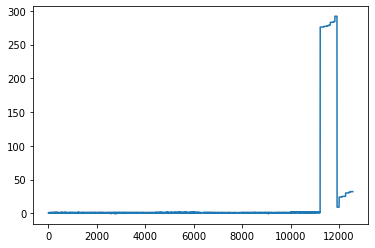

In [32]:
#For one column.
import matplotlib. pyplot as plt
df2['age']. plot()
plt.show()

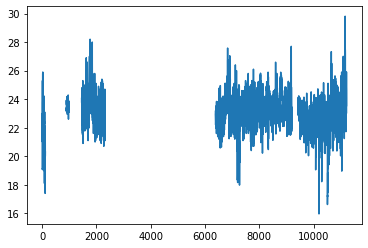

In [33]:
df2['clo']. plot()
plt. show()


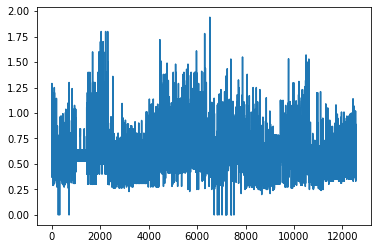

In [34]:
df2['met']. plot()
plt. show()


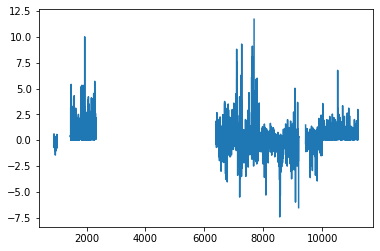

In [35]:
df2['dewpt']. plot()
plt. show()


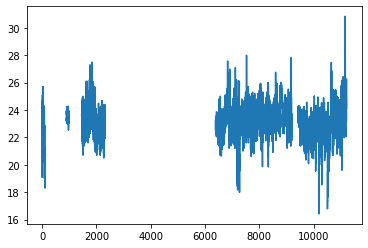

In [36]:
df2['PlaneRadtemp']. plot()
plt. show()


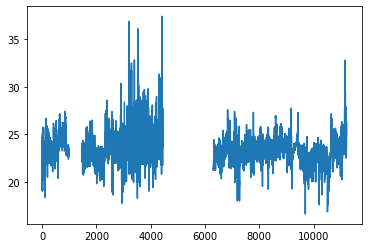

In [37]:
df2['Ta']. plot()
plt. show()


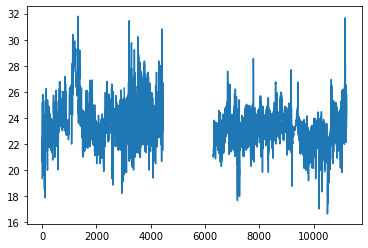

In [38]:
df2['tmrt']. plot()
plt. show()


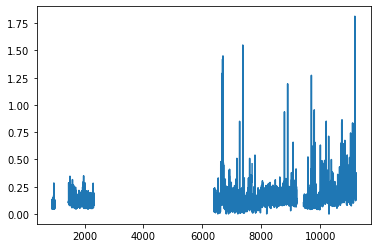

In [39]:
df2['vel']. plot()
plt. show()


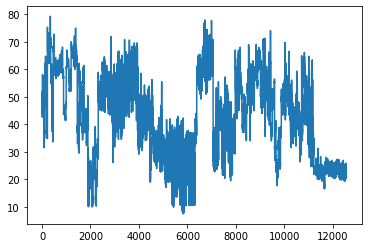

In [40]:
df2['Pa,']. plot()
plt. show()


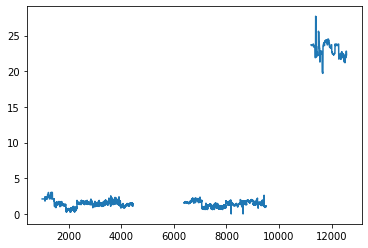

In [41]:
df2['ait turb']. plot()
plt. show()


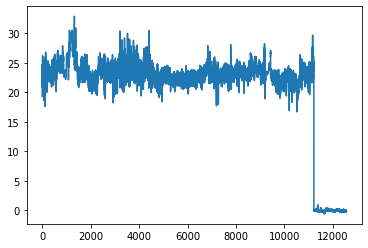

In [42]:
df2['Rh']. plot()
plt. show()


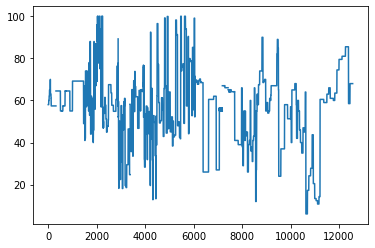

In [43]:
df2['TaOutdoor']. plot()
plt. show()


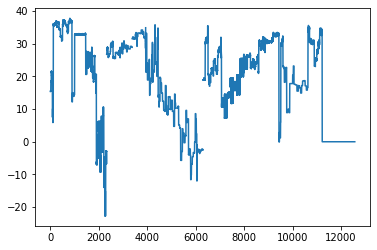

In [44]:
df2['RhOutdoor']. plot()
plt. show()


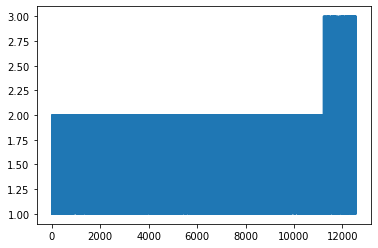

In [45]:
df2['Amv']. plot()
plt. show()


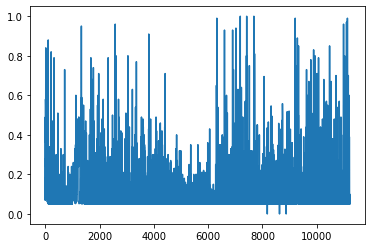

In [46]:
df2['PMV']. plot()
plt. show()


matplotlib.axes._subplots.AxesSubplot

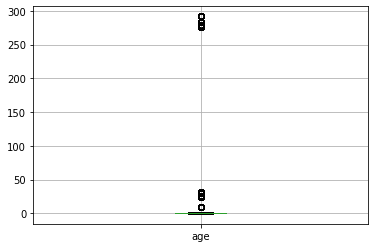

In [47]:
boxplot = df2.boxplot(column=['age'])
type(boxplot)


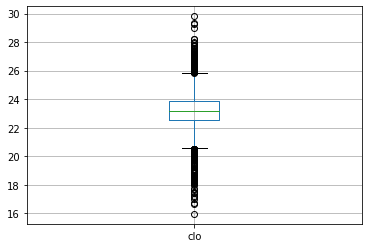

In [48]:
boxplot = df2.boxplot(column=['clo'])
boxplot

matplotlib.axes._subplots.AxesSubplot

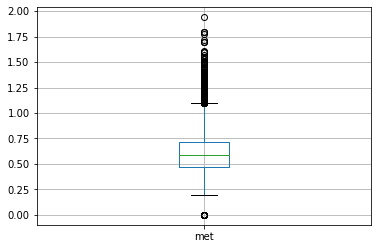

In [49]:
boxplot = df2.boxplot(column=['met'])
type(boxplot)

matplotlib.axes._subplots.AxesSubplot

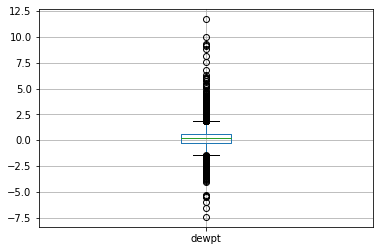

In [50]:
boxplot = df2.boxplot(column=['dewpt'])
type(boxplot)

matplotlib.axes._subplots.AxesSubplot

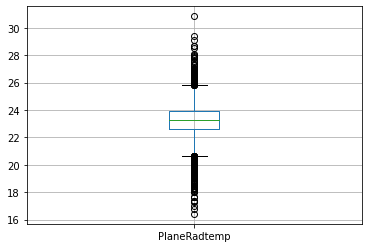

In [51]:
boxplot = df2.boxplot(column=['PlaneRadtemp'])
type(boxplot)

matplotlib.axes._subplots.AxesSubplot

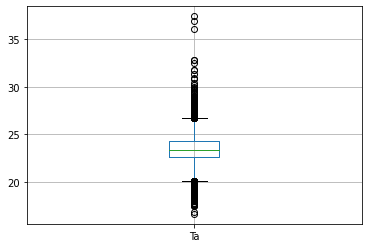

In [52]:
boxplot = df2.boxplot(column=['Ta'])
type(boxplot)

matplotlib.axes._subplots.AxesSubplot

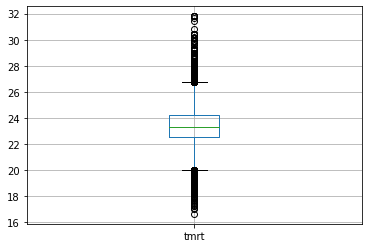

In [53]:
boxplot = df2.boxplot(column=['tmrt'])
type(boxplot)

matplotlib.axes._subplots.AxesSubplot

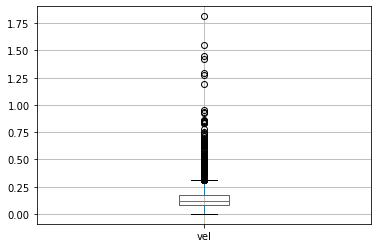

In [54]:
boxplot = df2.boxplot(column=['vel'])
type(boxplot)

matplotlib.axes._subplots.AxesSubplot

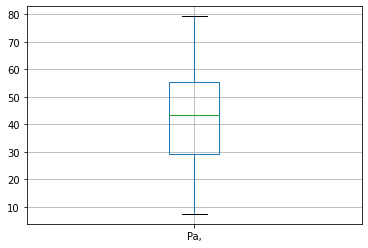

In [55]:
boxplot = df2.boxplot(column=['Pa,'])
type(boxplot)

matplotlib.axes._subplots.AxesSubplot

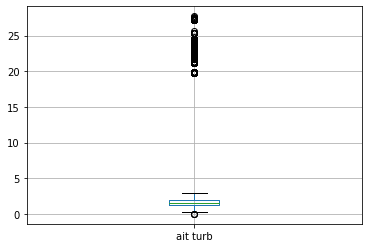

In [56]:
boxplot = df2.boxplot(column=['ait turb'])
type(boxplot)

matplotlib.axes._subplots.AxesSubplot

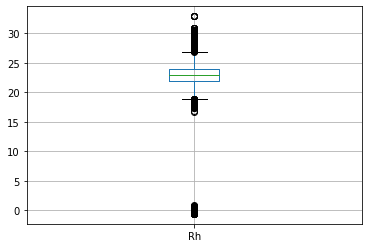

In [57]:
boxplot = df2.boxplot(column=['Rh'])
type(boxplot)

matplotlib.axes._subplots.AxesSubplot

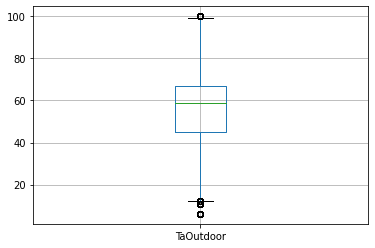

In [58]:
boxplot = df2.boxplot(column=['TaOutdoor'])
type(boxplot)

matplotlib.axes._subplots.AxesSubplot

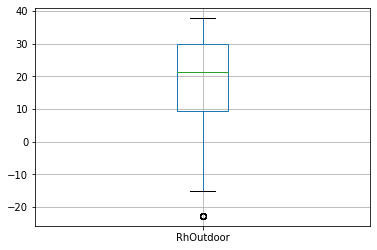

In [59]:
boxplot = df2.boxplot(column=['RhOutdoor'])
type(boxplot)

matplotlib.axes._subplots.AxesSubplot

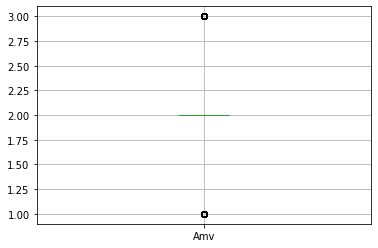

In [60]:
boxplot = df2.boxplot(column=['Amv'])
type(boxplot)

matplotlib.axes._subplots.AxesSubplot

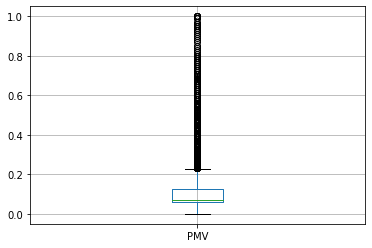

In [61]:
boxplot = df2.boxplot(column=['PMV'])
type(boxplot)

In [62]:
df2['age'] = df2['age'].fillna(df2['age'].mode()[0])   #filling with the mod because age is the categorcal attribute and mode is the best option to fill 

<ipython-input-62-f09109ed50d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age'] = df2['age'].fillna(df2['age'].mode()[0])   #filling with the mod because age is the categorcal attribute and mode is the best option to fill


In [63]:
df2['clo']= df2['clo'].fillna(df2['clo'].median())

<ipython-input-63-88f8b877a860>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clo']= df2['clo'].fillna(df2['clo'].median())


In [64]:
df2['dewpt']= df2['dewpt'].fillna(df2['dewpt'].median())

<ipython-input-64-7a1cbb184390>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['dewpt']= df2['dewpt'].fillna(df2['dewpt'].median())


In [65]:
df2['met'] =df2['met'].fillna(df2['met'].mean())

<ipython-input-65-9e19049997b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['met'] =df2['met'].fillna(df2['met'].mean())


In [66]:
df2['Ta'].fillna(df2['Ta'].mean())
df2['ait turb'].fillna(df2['ait turb'].mean())


0         5.123996
1         5.123996
2         5.123996
3         5.123996
4         5.123996
           ...    
12561    22.300000
12562    22.300000
12563    22.300000
12564    22.300000
12565    22.300000
Name: ait turb, Length: 12566, dtype: float64

In [67]:
df2['tmrt'] =df2['tmrt'].fillna(df2['tmrt'].mean())
df2['vel']= df2['vel'].fillna(df2['vel'].median())
df2['Pa'] =df2['Pa,'].fillna(df2['Pa,'].mean())
df2['Rh'] =df2['Rh'].fillna(df2['Rh'].mean())
df2['TaOutdoor'] =df2['TaOutdoor'].fillna(df2['TaOutdoor'].mean())
df2['RhOutdoor'] =df2['RhOutdoor'].fillna(df2['RhOutdoor'].mean())
df2['PMV'] =df2['PMV'].fillna(df2['PMV'].mean())
df2['Amv'].fillna(df2['Amv'].median())
df2['PlaneRadtemp'].fillna(df2['PlaneRadtemp'].median())
df2.info() #all the non null values in the updated version and the one column is drpped due to lack of info 








<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12566 entries, 0 to 12565
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           12566 non-null  float64
 1   clo           12566 non-null  float64
 2   met           12566 non-null  float64
 3   dewpt         12566 non-null  float64
 4   PlaneRadtemp  5677 non-null   float64
 5   Ta            8865 non-null   float64
 6   tmrt          12566 non-null  float64
 7   vel           12566 non-null  float64
 8   Pa,           12531 non-null  float64
 9   ait turb      7910 non-null   float64
 10  Rh            12566 non-null  float64
 11  TaOutdoor     12566 non-null  float64
 12  RhOutdoor     12566 non-null  float64
 13  Amv           12515 non-null  float64
 14  PMV           12566 non-null  float64
 15  Pa            12566 non-null  float64
dtypes: float64(16)
memory usage: 1.5 MB


<ipython-input-67-980bf707eae6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tmrt'] =df2['tmrt'].fillna(df2['tmrt'].mean())
<ipython-input-67-980bf707eae6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['vel']= df2['vel'].fillna(df2['vel'].median())
<ipython-input-67-980bf707eae6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feaa377ed90>,
      dtype=object)

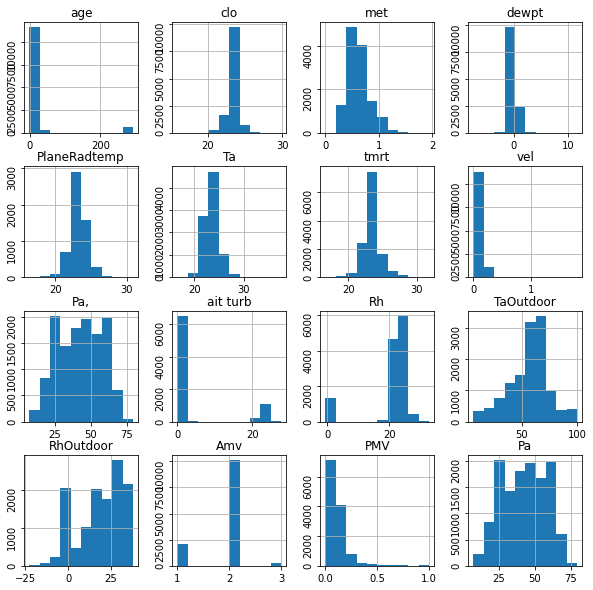

In [68]:
df2.hist(figsize=(10,10),yrot=90)

In [69]:
out=detect_outliers_iqr(df2['age'])
print(out)
out=detect_outliers_iqr(df2['clo'])
print(out)
out=detect_outliers_iqr(df2['met'])
print(out)
out=detect_outliers_iqr(df2['dewpt'])
print(out)
out=detect_outliers_iqr(df2['PlaneRadtemp'])
print(out)
out=detect_outliers_iqr(df2['Ta'])
print(out)
out=detect_outliers_iqr(df2['tmrt'])
print(out)
out=detect_outliers_iqr(df2['vel'])
print(out)
out=detect_outliers_iqr(df2['Pa'])
print(out)
out=detect_outliers_iqr(df2['ait turb'])
print(out)
out=detect_outliers_iqr(df2['Rh'])
print(out)
out=detect_outliers_iqr(df2['TaOutdoor'])
print(out)
out=detect_outliers_iqr(df2['RhOutdoor'])
print(out)
out=detect_outliers_iqr(df2['Amv'])
print(out)
out=detect_outliers_iqr(df2['PMV'])
print(out)



1349
5616
384
5430
0
0
1417
5419
0
0
1709
313
27
0
1222


In [70]:
import pandas as pd
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = df2.columns
d = scaler.fit_transform(df2)
new_df2 = pd.DataFrame(d,columns=names)
new_df2

,age,clo,met,dewpt,PlaneRadtemp,Ta,tmrt,vel,"Pa,",ait turb,Rh,TaOutdoor,RhOutdoor,Amv,PMV,Pa
0,0.003413,0.226715,0.335052,0.398536,0.220914,0.144923,0.179780,0.066152,0.609875,NaN,0.594272,0.552716,0.629752,0.0,0.070000,0.609875
1,0.003413,0.226715,0.402062,0.398536,0.220914,0.144923,0.179780,0.066152,0.610570,NaN,0.594272,0.552716,0.629752,0.0,0.100000,0.610570
2,0.003413,0.291697,0.541237,0.398536,0.186288,0.116950,0.190240,0.066152,0.618915,NaN,0.609189,0.552716,0.631405,0.5,0.180000,0.618915
3,0.003413,0.363899,0.206186,0.398536,0.262465,0.170056,0.259711,0.066152,0.591099,NaN,0.636038,0.552716,0.629752,0.0,0.170000,0.591099
4,0.003413,0.508303,0.190722,0.398536,0.387119,0.255938,0.384682,0.066152,0.531293,NaN,0.689737,0.552716,0.629752,0.0,0.490000,0.531293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12561,0.112628,0.522744,0.329897,0.398536,NaN,NaN,0.449705,0.066152,0.215577,0.805054,0.015513,0.659212,0.375207,1.0,0.112908,0.215577
12562,0.112628,0.522744,0.242268,0.398536,NaN,NaN,0.449705,0.066152,0.194715,0.805054,0.013126,0.659212,0.375207,1.0,0.112908,0.194715
12563,0.112628,0.522744,0.340206,0.398536,NaN,NaN,0.449705,0.066152,0.218359,0.805054,0.015811,0.659212,0.375207,1.0,0.112908,0.218359
12564,0.112628,0.522744,0.278351,0.398536,NaN,NaN,0.449705,0.066152,0.203060,0.805054,0.014021,0.659212,0.375207,0.5,0.112908,0.203060


In [71]:
variances=new_df2.var(axis=0, skipna=True)
print(variances)
#keepinh the variance thresold as 0.05 after normalization
#only the rejectio of the ait turb is prioritized 


age             0.047732
clo             0.003627
met             0.011734
dewpt           0.001308
PlaneRadtemp    0.007146
Ta              0.005204
tmrt            0.007919
vel             0.001404
Pa,             0.043879
ait turb        0.086698
Rh              0.048642
TaOutdoor       0.037185
RhOutdoor       0.044695
Amv             0.043051
PMV             0.009697
Pa              0.043757
dtype: float64


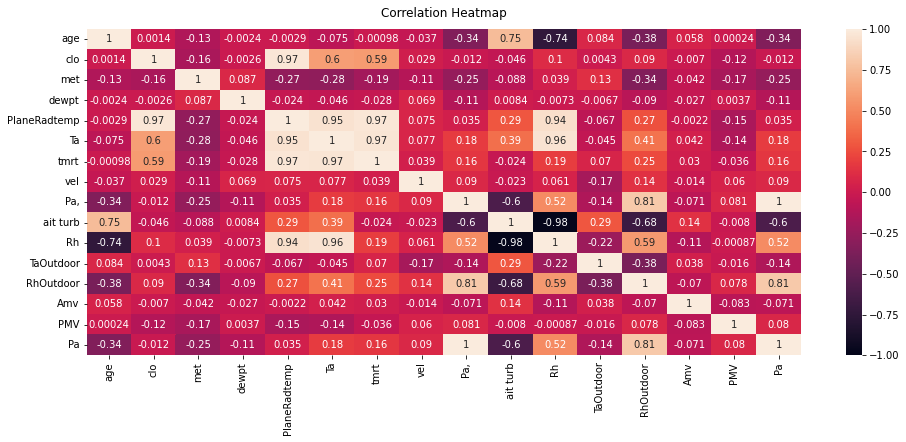

In [72]:
# Importing pandas package
import pandas as pd
# Importing seaborn as sns
import seaborn as sns
import matplotlib.pyplot as mp
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(new_df2.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


In [73]:
mask=np.zeros_like(new_df2.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

<function matplotlib.pyplot.show(*args, **kw)>

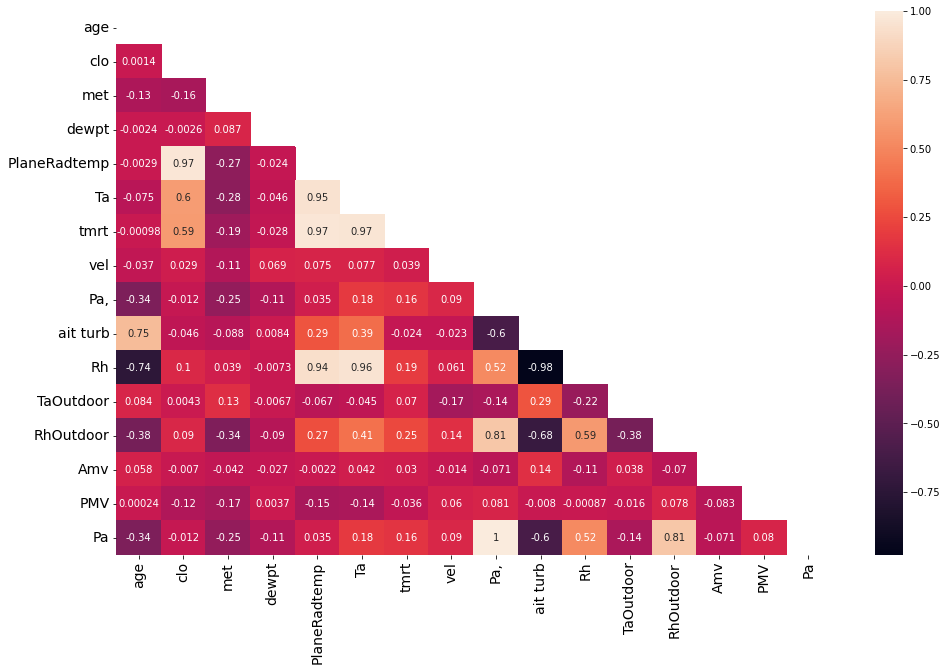

In [74]:

plt.figure(figsize=(16,10))
sns.heatmap(new_df2.corr(),mask=mask, vmax=1, annot=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show

In [75]:
new_df2

,age,clo,met,dewpt,PlaneRadtemp,Ta,tmrt,vel,"Pa,",ait turb,Rh,TaOutdoor,RhOutdoor,Amv,PMV,Pa
0,0.003413,0.226715,0.335052,0.398536,0.220914,0.144923,0.179780,0.066152,0.609875,NaN,0.594272,0.552716,0.629752,0.0,0.070000,0.609875
1,0.003413,0.226715,0.402062,0.398536,0.220914,0.144923,0.179780,0.066152,0.610570,NaN,0.594272,0.552716,0.629752,0.0,0.100000,0.610570
2,0.003413,0.291697,0.541237,0.398536,0.186288,0.116950,0.190240,0.066152,0.618915,NaN,0.609189,0.552716,0.631405,0.5,0.180000,0.618915
3,0.003413,0.363899,0.206186,0.398536,0.262465,0.170056,0.259711,0.066152,0.591099,NaN,0.636038,0.552716,0.629752,0.0,0.170000,0.591099
4,0.003413,0.508303,0.190722,0.398536,0.387119,0.255938,0.384682,0.066152,0.531293,NaN,0.689737,0.552716,0.629752,0.0,0.490000,0.531293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12561,0.112628,0.522744,0.329897,0.398536,NaN,NaN,0.449705,0.066152,0.215577,0.805054,0.015513,0.659212,0.375207,1.0,0.112908,0.215577
12562,0.112628,0.522744,0.242268,0.398536,NaN,NaN,0.449705,0.066152,0.194715,0.805054,0.013126,0.659212,0.375207,1.0,0.112908,0.194715
12563,0.112628,0.522744,0.340206,0.398536,NaN,NaN,0.449705,0.066152,0.218359,0.805054,0.015811,0.659212,0.375207,1.0,0.112908,0.218359
12564,0.112628,0.522744,0.278351,0.398536,NaN,NaN,0.449705,0.066152,0.203060,0.805054,0.014021,0.659212,0.375207,0.5,0.112908,0.203060


In [76]:
def calculate_entropy(df):
    prob = df.value_counts(normalize = True)
    entropy = -1 * np.sum(np.log2(prob) * prob)
    return round(entropy, 3)

In [77]:
print('Entropy of Age Column: {}'.format(calculate_entropy(new_df2['met'])))

Entropy of Age Column: 7.692


In [78]:
print('Entropy of Age Column: {}'.format(calculate_entropy(new_df2['clo'])))

Entropy of Age Column: 4.721


In [79]:
print('Entropy of Age Column: {}'.format(calculate_entropy(new_df2['vel'])))

Entropy of Age Column: 4.286


In [80]:
print('Entropy of Age Column: {}'.format(calculate_entropy(new_df2['ait turb'])))

Entropy of Age Column: 10.168


In [81]:
print('Entropy of Age Column: {}'.format(calculate_entropy(new_df2['Pa'])))

Entropy of Age Column: 10.878


In [82]:
print('Entropy of Age Column: {}'.format(calculate_entropy(new_df2['Rh'])))

Entropy of Age Column: 6.981


In [83]:
print('Entropy of Age Column: {}'.format(calculate_entropy(new_df2['PMV'])))

Entropy of Age Column: 5.097


In [84]:
print('Entropy of Age Column: {}'.format(calculate_entropy(new_df2['TaOutdoor'])))

Entropy of Age Column: 7.03


In [85]:
print('Entropy of Age Column: {}'.format(calculate_entropy(new_df2['RhOutdoor'])))

Entropy of Age Column: 7.48


In [86]:
def compute_impurity(feature, impurity_criterion):
    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
        
    return(round(impurity, 3))


# let's do two quick examples.
print('impurity using entropy:', compute_impurity(new_df2['age'], 'entropy'))



impurity using entropy: 1.982


In [94]:
def comp_feature_information_gain(new_df2, target, descriptive_feature, split_criterion):


    
    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)
    target_entropy = compute_impurity(new_df2[target], split_criterion)
    entropy_list = list()
    weight_list = list()
    
    for level in new_df2[descriptive_feature].unique():
        df_feature_level = new_df2[new_df2[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(new_df2)
        weight_list.append(round(weight_level, 3))

    print('impurity of partitions:', entropy_list)
    print('weights of partitions:', weight_list)

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    print('remaining impurity:', feature_remaining_impurity)
    
    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)

    return(information_gain)

In [95]:
split_criterion = 'entropy'
for feature in new_df2.drop(columns='Amv').columns:
    feature_info_gain = comp_feature_information_gain(new_df2, 'age', feature, split_criterion)
    


target feature: age
descriptive_feature: age
split criterion: entropy
impurity of partitions: [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
weights of partitions: [0.367, 0.479, 0.0, 0.046, 0.012, 0.01, 0.006, 0.005, 0.01, 0.005, 0.007, 0.007, 0.01, 0.011, 0.01, 0.005, 0.009]
remaining impurity: 0.0
information gain: 1.982
target feature: age
descriptive_feature: clo
split criterion: entropy
impurity of partitions: [-0.0, 0.811, 0.985, 0.983, 1.0, 0.937, 1.296, 1.0, 0.958, 0.918, 1.136, 0.961, 1.041, 0.991, 2.229, 0.983, 1.459, -0.0, 0.975, 1.422, 1.287, 1.252, 0.997, 1.226, 1.0, 1.026, 0.969, 1.073, 1.161, 1.023, 1.041, 0.918, -0.0, -0.0, 1.185, 0.971, -0.0, -0.0, 1.156, 0.811, -0.0, -0.0, 1.309, -0.0, 0.803, 1.096, 1.459, 1.3, 1.122, 1.268, 1.221, 1.253, 0.905, 0.98, 1.167, 1.239, 1.135, 1.224, 1.485, 1.529, 1.311, 1.379, 1.349, 1.322, 1.5, 0.918, 1.199, 0.961, 1.352, 1.296, 1.189, 0.971, 1.242, 1.122, 1.096, 1.337, 1.353, 1.50

In [89]:
feature_info_gain = comp_feature_information_gain(new_df2, 'PlaneRadtemp', feature, split_criterion)


target feature: PlaneRadtemp
descriptive_feature: Pa
split criterion: entropy
impurity of partitions: [1.0, 2.0, -0.0, 0.918, 1.585, -0.0, 1.585, 2.0, -0.0, 5.902, 2.0, -0.0, -0.0, 4.664, 0.811, 2.617, 1.585, 1.0, 1.585, 1.5, -0.0, 2.0, -0.0, 1.061, 0.811, 1.585, 1.585, 1.585, -0.0, 1.0, 1.585, 0.811, -0.0, 1.0, -0.0, -0.0, -0.0, 5.333, -0.0, -0.0, -0.0, -0.0, -0.0, 2.646, 1.922, 1.0, -0.0, 2.522, 1.149, 1.585, 1.549, -0.0, -0.0, 1.5, 0.811, 1.585, -0.0, 1.0, 2.0, -0.0, 5.484, -0.0, -0.0, -0.0, 5.533, -0.0, 5.57, -0.0, 1.0, 2.0, 5.123, 1.585, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, 5.26, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, 1.0, -0.0, 1.0, -0.0, 1.0, 1.585, 1.0, -0.0, 2.252, -0.0, 4.502, -0.0, 1.0, -0.0, -0.0, 2.522, 1.585, -0.0, 5.549, 2.0, -0.0, 1.585, 1.585, -0.0, -0.0, 2.252, -0.0, 1.585, 1.0, -0.0, -0.0, -0.0, 3.17, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0

In [90]:
feature_info_gain = comp_feature_information_gain(new_df2, 'met', feature, split_criterion)


target feature: met
descriptive_feature: Pa
split criterion: entropy
impurity of partitions: [1.0, 2.0, 1.0, 1.585, 2.0, -0.0, 2.922, 3.0, 1.0, 4.943, 1.5, -0.0, -0.0, 4.712, 2.585, 3.418, 1.585, 2.642, 2.128, 3.0, -0.0, 2.585, 2.322, 3.252, 2.322, 2.0, 1.585, 1.585, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.585, 4.855, 1.0, -0.0, -0.0, 1.585, 1.0, 3.096, 2.807, 2.0, 2.419, 3.53, 2.845, 3.892, 3.17, -0.0, 1.0, 2.0, 2.585, 0.918, -0.0, 1.0, 2.0, -0.0, 4.255, 2.918, 1.922, 2.522, 5.09, 2.0, 4.981, 3.002, 3.457, 3.325, 4.65, 3.523, 3.264, 3.833, 2.74, 2.55, 3.022, 2.557, 3.027, 2.948, 3.122, 1.5, 2.197, 2.914, 2.0, 4.537, 0.811, 2.281, 2.0, 2.446, 2.0, 2.252, 1.95, 1.922, 2.807, 1.585, 0.971, 1.922, 2.948, 2.75, 2.807, 2.322, 3.335, 2.948, 4.482, 3.664, 2.948, 2.948, 3.096, 3.852, 3.17, 3.522, 4.918, 1.922, 2.322, 2.0, 1.5, 2.585, 1.0, 1.664, 2.252, 2.75, 1.585, 2.948, 2.0, 3.393, 4.585, 2.322, 3.0, -0.0, -0.0, -0.0, 1.0, 1.5, 1.5, 1.585, -0.0, 2.0, 1.0, 1.0, 1.0, -0.0, 1.585, 1.0, 1.0, 2

In [91]:
feature_info_gain = comp_feature_information_gain(new_df2, 'ait turb', feature, split_criterion)


target feature: ait turb
descriptive_feature: Pa
split criterion: entropy
impurity of partitions: [-0.0, 1.0, -0.0, -0.0, 1.0, -0.0, 0.811, -0.0, -0.0, 5.685, 1.585, -0.0, -0.0, 4.681, -0.0, 1.585, -0.0, -0.0, 0.722, -0.0, -0.0, 1.585, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 5.24, -0.0, -0.0, -0.0, -0.0, -0.0, 2.322, 1.585, -0.0, -0.0, 2.0, -0.0, 1.0, 1.585, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, 4.694, 0.544, -0.0, -0.0, 5.582, -0.0, 4.95, -0.0, 1.0, 1.5, 4.91, 0.848, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, 1.664, -0.0, -0.0, -0.0, -0.0, -0.0, 4.546, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, 1.0, -0.0, 1.0, -0.0, 1.0, 1.0, 1.0, -0.0, 1.792, 0.811, 4.143, 1.0, 0.811, -0.0, -0.0, 2.236, 1.585, -0.0, 5.527, 1.585, -0.0, 1.585, -0.0, -0.0, -0.0, 2.585, -0.0, 1.585, 1.0, -0.0, -0.0, -0.0, 2.948, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0

In [100]:
feature_info_gain = comp_feature_information_gain(new_df2, 'TaOutdoor', feature, split_criterion)


target feature: TaOutdoor
descriptive_feature: Pa
split criterion: entropy
impurity of partitions: [1.0, 1.5, -0.0, 0.918, 2.0, -0.0, 2.446, 2.0, 1.0, 3.595, 1.5, -0.0, -0.0, 3.274, 1.459, 1.585, 1.585, 1.753, 1.664, 2.5, -0.0, 2.585, 0.971, 1.281, 1.371, 2.0, 1.585, 1.585, -0.0, -0.0, 2.0, 0.811, -0.0, 1.0, -0.0, -0.0, -0.0, 3.384, -0.0, -0.0, -0.0, -0.0, -0.0, 2.55, 2.807, 2.0, 2.725, 3.239, 2.04, 2.437, 1.88, -0.0, -0.0, 1.5, 1.459, 0.918, -0.0, 1.0, 1.5, -0.0, 2.817, 1.781, 1.371, 1.842, 3.611, 1.5, 3.201, 1.675, 2.042, 1.809, 3.193, 1.924, 1.809, 1.861, 1.782, 1.868, 1.855, 1.577, 1.491, 2.108, 1.571, 1.5, 1.891, 1.573, 1.5, 3.097, 1.5, 1.224, 1.5, 1.361, 2.0, 1.459, 1.842, 0.971, 2.236, 0.918, 1.922, 1.922, 2.725, 2.406, 2.236, 1.922, 2.873, 1.891, 2.984, 2.353, 2.419, 1.753, 2.187, 3.146, 2.113, 2.217, 3.675, 2.322, 2.322, 1.5, 2.0, 1.459, 1.0, 2.128, 1.918, 3.0, 1.585, 2.419, 1.0, 3.027, 3.099, 0.971, 2.406, -0.0, -0.0, -0.0, 1.0, 0.811, 1.0, 0.918, -0.0, 0.811, 1.0, -0.0, -0.0

In [96]:
split_criterion = 'entropy'
for feature in new_df2.drop(columns='PMV').columns:
    feature_info_gain = comp_feature_information_gain(new_df2, 'Pa', feature, split_criterion)
  


target feature: Pa
descriptive_feature: age
split criterion: entropy
impurity of partitions: [10.173, 10.676, 2.0, 8.887, 4.828, 5.567, 5.014, 4.616, 5.619, 4.753, 4.692, 5.012, 5.177, 5.089, 5.467, 4.765, 5.31]
weights of partitions: [0.367, 0.479, 0.0, 0.046, 0.012, 0.01, 0.006, 0.005, 0.01, 0.005, 0.007, 0.007, 0.01, 0.011, 0.01, 0.005, 0.009]
remaining impurity: 9.804784
information gain: 1.0732160000000004
target feature: Pa
descriptive_feature: clo
split criterion: entropy
impurity of partitions: [1.0, 1.5, 2.522, 6.993, 1.0, 4.087, 3.335, 3.322, 6.093, 3.585, 6.022, 4.7, 6.412, 3.17, 9.613, 4.1, 2.585, 1.585, 4.681, 4.263, 2.74, 4.17, 4.879, 5.874, 1.0, 6.389, 6.356, 6.351, 5.988, 6.014, 6.118, -0.0, -0.0, -0.0, 5.445, -0.0, -0.0, 0.918, 5.072, 0.811, -0.0, -0.0, 3.278, -0.0, 4.059, 3.278, 3.585, 4.17, 4.0, 4.297, 4.087, 4.087, 6.667, 3.585, 4.143, 3.547, 4.059, 2.948, 4.322, 4.143, 4.755, 3.807, 3.459, 3.459, 3.703, 3.585, 4.0, 3.547, 4.17, 3.807, 3.585, 3.122, 3.907, 4.0, 3.45

In [97]:
feature_info_gain = comp_feature_information_gain(new_df2, 'Rh', feature, split_criterion)


target feature: Rh
descriptive_feature: Pa
split criterion: entropy
impurity of partitions: [1.0, 2.0, 1.0, 1.585, 2.0, -0.0, 3.122, 2.406, 1.0, 5.991, 2.0, -0.0, -0.0, 4.852, 1.459, 2.292, 1.585, 3.17, 1.664, 2.75, -0.0, 2.585, 1.371, 2.189, 2.322, 2.0, 1.585, 1.585, -0.0, 1.0, 2.0, 0.811, -0.0, 1.0, -0.0, 1.0, -0.0, 5.23, 1.0, -0.0, -0.0, 0.918, 1.0, 3.027, 2.807, 2.0, 2.059, 2.703, 2.3, 3.111, 2.281, -0.0, -0.0, 2.0, 1.459, 1.585, -0.0, 1.0, 2.0, -0.0, 5.236, 2.292, 2.322, 2.807, 5.795, 2.0, 5.331, 3.984, 3.323, 3.664, 5.388, 2.457, 3.852, 2.995, 3.907, 3.278, 3.418, 2.692, 3.278, 3.419, 2.846, 2.0, 2.948, 3.278, 2.0, 4.918, 2.0, 3.17, 2.0, 2.922, 2.0, 2.585, 2.807, 2.322, 2.522, 1.585, 2.322, 2.322, 2.948, 3.0, 2.807, 2.322, 2.719, 2.642, 4.774, 2.807, 2.113, 2.642, 2.914, 3.337, 2.725, 2.842, 5.604, 2.322, 2.322, 2.0, 2.0, 1.918, 1.0, 2.807, 2.252, 2.406, 1.585, 2.948, 2.0, 2.624, 4.002, 1.922, 2.75, -0.0, -0.0, -0.0, 1.0, 2.0, 2.0, 1.585, -0.0, 2.0, 1.0, 1.0, 1.0, -0.0, 1.585, 1.

In [98]:
feature_info_gain = comp_feature_information_gain(new_df2, 'dewpt', feature, split_criterion)


target feature: dewpt
descriptive_feature: Pa
split criterion: entropy
impurity of partitions: [-0.0, 1.5, -0.0, -0.0, 1.5, -0.0, 0.922, 1.549, -0.0, 6.043, 2.0, -0.0, -0.0, 4.509, 0.65, 1.418, 1.585, 0.503, 1.149, 1.061, -0.0, 1.252, -0.0, 0.414, 0.722, 1.5, 1.585, 0.918, -0.0, 1.0, 1.5, 0.811, -0.0, 1.0, -0.0, -0.0, -0.0, 5.42, -0.0, -0.0, -0.0, -0.0, -0.0, 2.404, 2.128, 0.811, -0.0, 1.497, 0.866, 0.591, 1.224, -0.0, -0.0, 1.5, 0.65, 0.918, -0.0, 1.0, 1.5, -0.0, 4.04, 0.414, 0.722, 0.592, 5.437, -0.0, 4.237, -0.0, 0.7, 1.292, 4.264, 0.561, 0.323, -0.0, 0.353, -0.0, 0.414, -0.0, 0.866, 0.614, -0.0, 0.811, -0.0, -0.0, -0.0, 3.522, -0.0, -0.0, -0.0, 0.469, 1.5, 0.65, 0.592, -0.0, 1.149, -0.0, 0.722, 0.722, 0.986, 1.549, 0.592, 0.722, 2.035, 0.503, 4.39, 0.371, 0.986, 0.503, -0.0, 2.016, 1.447, -0.0, 5.707, 2.322, 0.722, 1.5, 1.5, -0.0, 1.0, 2.807, -0.0, 1.061, 1.585, 0.503, -0.0, -0.0, 2.143, -0.0, 1.061, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0

In [99]:
 feature_info_gain = comp_feature_information_gain(new_df2, 'vel', feature, split_criterion)
    

target feature: vel
descriptive_feature: Pa
split criterion: entropy
impurity of partitions: [-0.0, 1.5, -0.0, -0.0, 1.5, -0.0, 0.922, 1.549, -0.0, 5.675, 2.0, -0.0, -0.0, 4.451, 0.65, 1.418, 1.585, 0.503, 1.149, 1.061, -0.0, 1.792, -0.0, 0.414, 0.722, 1.5, 1.585, 1.585, -0.0, 1.0, 1.5, 0.811, -0.0, 1.0, -0.0, -0.0, -0.0, 5.132, -0.0, -0.0, -0.0, -0.0, -0.0, 2.404, 2.128, 0.811, -0.0, 1.497, 0.866, 0.591, 1.447, -0.0, -0.0, 1.5, 0.65, 1.585, -0.0, 1.0, 2.0, -0.0, 3.592, 0.414, 0.722, 0.592, 5.041, 0.811, 4.123, -0.0, 0.7, 1.435, 4.174, 0.627, 0.323, -0.0, 0.353, -0.0, 0.414, -0.0, 0.866, 0.614, -0.0, 0.811, -0.0, -0.0, -0.0, 3.399, -0.0, -0.0, -0.0, 0.469, 1.5, 0.65, 0.592, -0.0, 1.149, -0.0, 1.371, 0.722, 0.986, 1.549, 1.149, 0.722, 2.035, 0.503, 4.19, 0.735, 0.986, 0.503, -0.0, 2.133, 1.447, -0.0, 5.5, 2.322, 0.722, 1.5, 2.0, -0.0, 1.0, 2.522, -0.0, 1.549, 1.585, 0.503, -0.0, -0.0, 2.143, -0.0, 1.061, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0,

In [103]:
X = new_df2.drop(['PlaneRadtemp', 'ait turb','met','TaOutdoor'], axis=1)
y = new_df2['PMV']

In [104]:
X.shape, y.shape

((12566, 12), (12566,))

In [121]:
#!pip install mlxtend upgrade
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from sklearn.linear_model import LinearRegression

In [163]:
!pip install mlxtend --upgrade 
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=2,forward=True, verbose=2, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(X, y)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py", line 662, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.8

['Ta']


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py", line 662, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ut

In [164]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['Ta']


In [154]:
X1 = new_df2.drop(['PlaneRadtemp', 'ait turb','met','TaOutdoor'], axis=1)
y1 = new_df2['PMV']

In [158]:
X1.shape
y1.shape


(12566,)

In [162]:
!pip install mlxtend --upgrade 
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lreg = LinearRegression()
sfs2 = sfs(lreg, k_features=2,forward=False, verbose=2, scoring='neg_mean_squared_error')
sfs2= sfs2.fit(X1, y1)
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py", line 662, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ut

['age', 'clo', 'dewpt', 'Ta', 'tmrt', 'vel', 'Pa,', 'Rh', 'RhOutdoor', 'Amv', 'PMV', 'Pa']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py", line 662, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y

In [175]:
x1 = new_df2.loc[:,["PlaneRadtemp","ait turb"]]
y1 = new_df2.loc[:,["Amv"]]
x = x1.to_numpy()
y = y1.to_numpy()
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=104,test_size=0.25,shuffle=True)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()  


In [179]:
X = new_df2[['age', 'met', 'clo','vel', 'ait turb', 'Pa', 'Rh', 'TaOutdoor', 'RhOutdoor']]
y = new_df2.drop(X, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)
object = MinMaxScaler()
object.fit_transform(X_train)
object.fit_transform(X_test)

array([[0.00341297, 0.38453333, 0.4827856 , ..., 0.79974571, 0.49717079,
        0.76694215],
       [0.00341297, 0.27711111, 0.4827856 , ..., 0.81563891, 0.42960119,
        0.85785124],
       [0.00682594, 0.22222222, 0.52973396, ..., 0.76478067, 0.6485623 ,
        0.81818182],
       ...,
       [0.00682594, 0.6       , 0.4827856 , ..., 0.73299428, 0.58785942,
        0.5338843 ],
       [0.00341297, 0.51666667, 0.4827856 , ..., 0.70438652, 0.6656017 ,
        0.32231405],
       [0.00682594, 0.23703333, 0.4827856 , ..., 0.78385251, 0.14378501,
        0.87768595]])

In [183]:
#forward selection AMV logistic regression
a_x = new_df2[['age', 'met', 'clo', 'vel', 'ait turb', 'Pa', 'Rh', 'TaOutdoor', 'RhOutdoor']]
a_y = new_df2['Amv']
f_s = sfs(LogisticRegression(), n_features_to_select = 5, direction = 'forward')
f_s.fit(a_x, a_y)
print(f_s.get_support())
X_train_afs = X_train[['age', 'vel','Rh', 'TaOutdoor', 'RhOutdoor']]
y_train_afs = y_train['AMV']
X_test_afs = X_test[['age', 'vel','Rh', 'TaOutdoor', 'RhOutdoor']]
y_test_afs = y_test['Amv']
logreg_ = LogisticRegression()
logreg_.fit(X_train_afs, y_train_afs)
y_pred = logreg_.predict(X_test_afs)
accuracy_score(y_test_afs, y_pred)

In [183]:
kf = KFold(n_splits = 3, shuffle = True, random_state = 101)
cross_val_score(lreg_, X_train_pfs, y_train_pfs)
kf = KFold(n_splits = 3, shuffle = True, random_state = 101)
cross_val_score(logreg_, X_train_abs, y_train_abs)
confusion_matrix(y_test_abs, X_test_abs